# Applying Python tools at preliminary analysis of a dataset
Dataset about sales is part of the MIT Course - Supply Chain Analytics - by edX Online


In [83]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [153]:
#Loading data
dados = pd.read_excel("TinyCo_Store312.xlsx")

In [172]:
dados.columns

Index(['DB_ID', 'SKU', 'Store', 'Date', 'Unit Sales', 'Sales'], dtype='object')

In [154]:
dados.head(20)

,DB_ID,SKU,Store,Date,Unit Sales,Sales
0,79444,50012011250,312,2014-08-04,3,29.97
1,79445,50012011250,312,2014-08-05,2,19.98
2,79446,50012011250,312,2014-08-06,5,49.95
3,79447,50012011250,312,2014-08-07,3,29.97
4,79448,50012011250,312,2014-08-08,7,69.93
5,79449,50012011250,312,2014-08-09,4,39.96
6,79450,50012011250,312,2014-08-11,4,39.96
7,79451,50012011250,312,2014-08-12,4,39.96
8,79452,50012011250,312,2014-08-13,1,9.99
9,79453,50012011250,312,2014-08-14,3,29.97


In [155]:
dados.describe()

,DB_ID,Store,Sales
count,3.696000e+03,3696.0,3616.000000
mean,5.095478e+05,312.0,1097.783678
std,6.984279e+05,0.0,20388.315627
min,7.944400e+04,312.0,-59.940000
25%,8.282375e+04,312.0,15.980000
50%,9.380850e+04,312.0,31.990000
75%,1.000653e+06,312.0,68.970000
max,2.001795e+06,312.0,599400.000000


In [156]:
dados.shape

(3696, 6)

In [157]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DB_ID       3696 non-null   int64         
 1   SKU         3696 non-null   object        
 2   Store       3696 non-null   int64         
 3   Date        3696 non-null   datetime64[ns]
 4   Unit Sales  3646 non-null   object        
 5   Sales       3616 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 173.4+ KB


<AxesSubplot:xlabel='Date'>

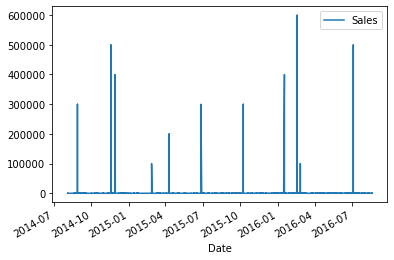

In [158]:
dados.plot(x="Date", y="Sales")

In [10]:
##### Verify consistency in SKUs ####

dados["SKU"].unique()

#SKU 50*12011250 looks incorrect - Mistyping?

array([50012011250, '50*12011250', 50012011340, 50012011341, 50013000110,
       8000451112, 7312455530, 7312455520, 8000520021, 50012011240],
      dtype=object)

In [159]:
#### Verify consistency in Sales records ####

SKU_totals = dados.groupby("SKU").sum()
SKU_totals["Sales"]

# SKU 50012011250 presents a number much larger than the rest of the values - Mistyping?

SKU
7312455520       20773.73
7312455530       26231.59
8000451112      152318.02
8000520021       27392.58
50012011240      10077.57
50012011250    3717570.51
50012011340       3109.88
50012011341       1457.16
50013000110      10404.99
50*12011250        249.75
Name: Sales, dtype: float64

<AxesSubplot:xlabel='SKU'>

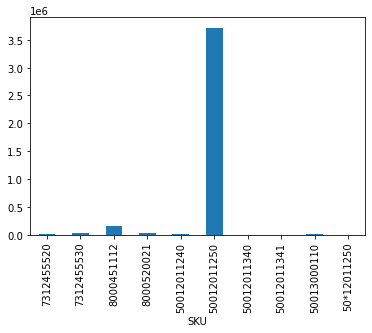

In [160]:
#plot about consistency in Sales records

dados["Sales"].groupby(dados["SKU"]).sum().plot(kind="bar")

#SKU 50012011250 looks inconsistent

#### Verifying consistency in Sales Records ####
### (1/3) Unsual values in SKU 50012011250 ###
### (2/3) Negative and Zero Records ###
### (3/3) Nan values ###

In [186]:
### (1/3) Unsual values in SKU 50012011250 ###

#Using .loc to create a dataframe with all records of SKU 50012011250

rows_SKU_11250 = dados.loc[dados.SKU == 50012011250, :]
rows_SKU_11250

,DB_ID,SKU,Store,Date,Unit Sales,Sales
0,79444,50012011250,312,2014-08-04,3,29.97
1,79445,50012011250,312,2014-08-05,2,19.98
2,79446,50012011250,312,2014-08-06,5,49.95
3,79447,50012011250,312,2014-08-07,3,29.97
4,79448,50012011250,312,2014-08-08,7,69.93
...,...,...,...,...,...,...
611,80055,50012011250,312,2016-08-02,3,29.97
612,80056,50012011250,312,2016-08-03,4,39.96
613,80057,50012011250,312,2016-08-04,4,39.96
614,80058,50012011250,312,2016-08-05,5,49.95


In [187]:
### SKU 50012011250 ###

#Creating a mask to apply at rows dataframe and visualize all records higher than 100
#Check if the records must be remain or deleted 

mask1= rows_SKU_11250["Sales"] > 100
filtered_dados = rows_SKU_11250[mask1]
len(filtered_dados)


17

In [188]:
### SKU 50012011250 ###

print(filtered_dados)

     DB_ID          SKU  Store       Date Unit Sales      Sales
21   79465  50012011250    312 2014-08-28      30000  299700.00
45   79489  50012011250    312 2014-09-27         11     109.89
89   79533  50012011250    312 2014-11-18      50000  499500.00
98   79542  50012011250    312 2014-11-28      40000  399600.00
124  79568  50012011250    312 2014-12-30          7     699.93
174  79618  50012011250    312 2015-02-26      10000   99900.00
210  79654  50012011250    312 2015-04-10      20000  199800.00
276  79720  50012011250    312 2015-06-27      30000  299700.00
362  79806  50012011250    312 2015-10-09      30000  299700.00
427  79871  50012011250    312 2015-12-24          5     499.95
448  79892  50012011250    312 2016-01-18      40000  399600.00
470  79914  50012011250    312 2016-02-13          2     199.98
474  79918  50012011250    312 2016-02-18      60000  599400.00
481  79925  50012011250    312 2016-02-26      10000   99900.00
491  79935  50012011250    312 2016-03-1

In [195]:
### (2/3) Negative and Zero Records ###

#Using .loc to create a dataframe with all negative and zero values

rows_neg_values = dados.loc[dados.Sales <=0, :]
rows_neg_values

,DB_ID,SKU,Store,Date,Unit Sales,Sales
94,79538,50012011250,312,2014-11-24,-2,-19.98
96,79540,50012011250,312,2014-11-26,-3,-29.97
201,79645,50012011250,312,2015-03-31,-4,-39.96
262,79706,50012011250,312,2015-06-11,-6,-59.94
303,79747,50012011250,312,2015-07-31,-4,-39.96
358,79802,50012011250,312,2015-10-05,-4,-39.96
420,79864,50012011250,312,2015-12-16,-2,-19.98
421,79865,50012011250,312,2015-12-17,-5,-49.95
495,79939,50012011250,312,2016-03-15,0,0.00
521,79965,50012011250,312,2016-04-16,0,0.00


In [194]:
len(rows_neg_values)

55

In [203]:
### (3/3) Nan values ###

#Using .loc to create a dataframe with all Nan values

rows_nan_values = dados[dados["Sales"].isna()]
rows_nan_values

,DB_ID,SKU,Store,Date,Unit Sales,Sales
16,79460,50012011250,312,2014-08-22,NaN,NaN
26,79470,50012011250,312,2014-09-03,-A45%0 9,NaN
49,79493,50012011250,312,2014-10-02,NaN,NaN
55,79499,50012011250,312,2014-10-09,NaN,NaN
58,79502,50012011250,312,2014-10-13,-A45%0 2,NaN
...,...,...,...,...,...,...
3559,2001659,50012011240,312,2016-02-09,#0 2,NaN
3582,2001682,50012011240,312,2016-03-08,NaN,NaN
3647,2001747,50012011240,312,2016-06-03,NaN,NaN
3685,2001785,50012011240,312,2016-07-25,#0 2,NaN
